# Business Understanding

Fraud in transactions has always been a challenge for businesses which have a tendency to cause huge monetary losses. Fraud detection can be performed to detect fraud transactions and obtain possible patterns of fraud transactions. Hence, transaction system can take preventive steps to avoid frauds.

The primary objectives to be achieved in data mining are identifying fraud transactions by discovering underlying important factors and to automate fraud detection processes with predictive analytics such as machine learning algorithms, data mining and predictive modelling.

*   Business success criteria 
    * To train a model that is able to detect more than 80% of fraud transactions.

*   Project plan

    * Data acquisition - Includes the process of gathering, filtering and cleaning the data before proceeding to further analysis.

    * Exploratory Data Analysis (EDA) - To summarize the data into their characteristics and visualize the data.
    
    * Perform model training and evaluation - Build model with different machine learning algorithms and assess each model to choose the best model.

To carry out this data mining project, Python and machine learnning algorithm will be used to perform EDA and modelling.

# Data Understanding

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.pipeline import Pipeline

from sklearn.preprocessing import RobustScaler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

## Data Collection

The dataset of this project are acquired from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [2]:
# Import data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* The dataset acquired is in the CSV format.
* Two days of transactions are presented in this dataset.
* The dataset consists of 284807 transactions with 31 features.


* Principle Component Analysis (PCA) transformation is performed to reduce the dimension of the dataset as to protect sentive features.
* With PCA, principal components such as V1 to V28 features are obtained.
* 'Time' and 'Amount' features are excluded to undergo PCA.
* Time - Time interval in seconds between each transaction and the first transaction.
* Amount - Transaction amount.
* Class - Target variable of the dataset. A transaction is fraud if the value is 1, a transaction is non fraud if the value is 0.


* There is no missing value in the dataset, imputation of missing values is not needed.
* The data type of every column is float64, except data type for column 'Class' is int64.

## Data Exploration 

### Distribution of fraud transaction and non-fraud transaction

In [4]:
print('{:5f} ({}) of the dataset is a non-fraud transaction.'.format(df['Class'].value_counts()[0]/len(df), df['Class'].value_counts()[0]))
print('{:5f} ({})  of the dataset is a fraud transaction.'.format(df['Class'].value_counts()[1]/len(df), df['Class'].value_counts()[1]))

0.998273 (284315) of the dataset is a non-fraud transaction.
0.001727 (492)  of the dataset is a fraud transaction.


Text(0.5, 1.0, 'Class Distributions \n (0: Non Fraud || 1: Fraud)')

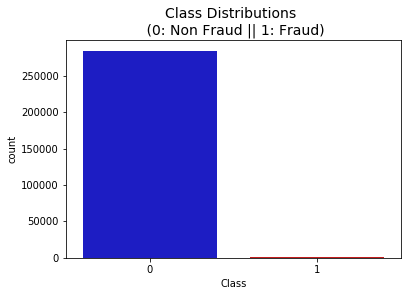

In [5]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: Non Fraud || 1: Fraud)', fontsize=14)

*   492 transactions (0.00172) are fraud trasactions.
*   284315 transactions (0.99827) are non-fraud transactions.
*   The dataset is highly imbalanced, most of the transactions are non-fraud.
* Since the dataset is highly imbalanced, therefore different matrix (Precision, Recall) and resampling technique are mostly needed and will be introduced in later stage.

### Correlation Matrices

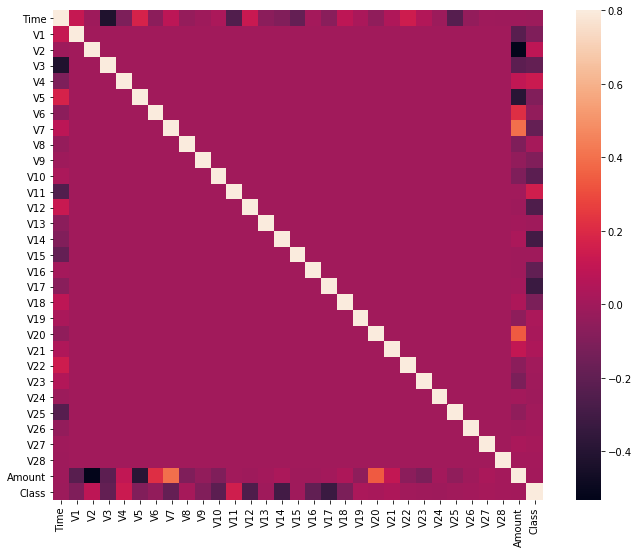

In [6]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

* V17, V14, V12 and V10 are **negatively correlated**. The lower the values, the more likely the result is a fraud transaction.
* V2, V4, V11 and V19 are **positively correlated**. The higher the values, the most likely the result is a fraud transaction.
* The features in the dataset is relatively small, feature selection will be performed after the training of baseline model with the help of feature importance.

### Histogram

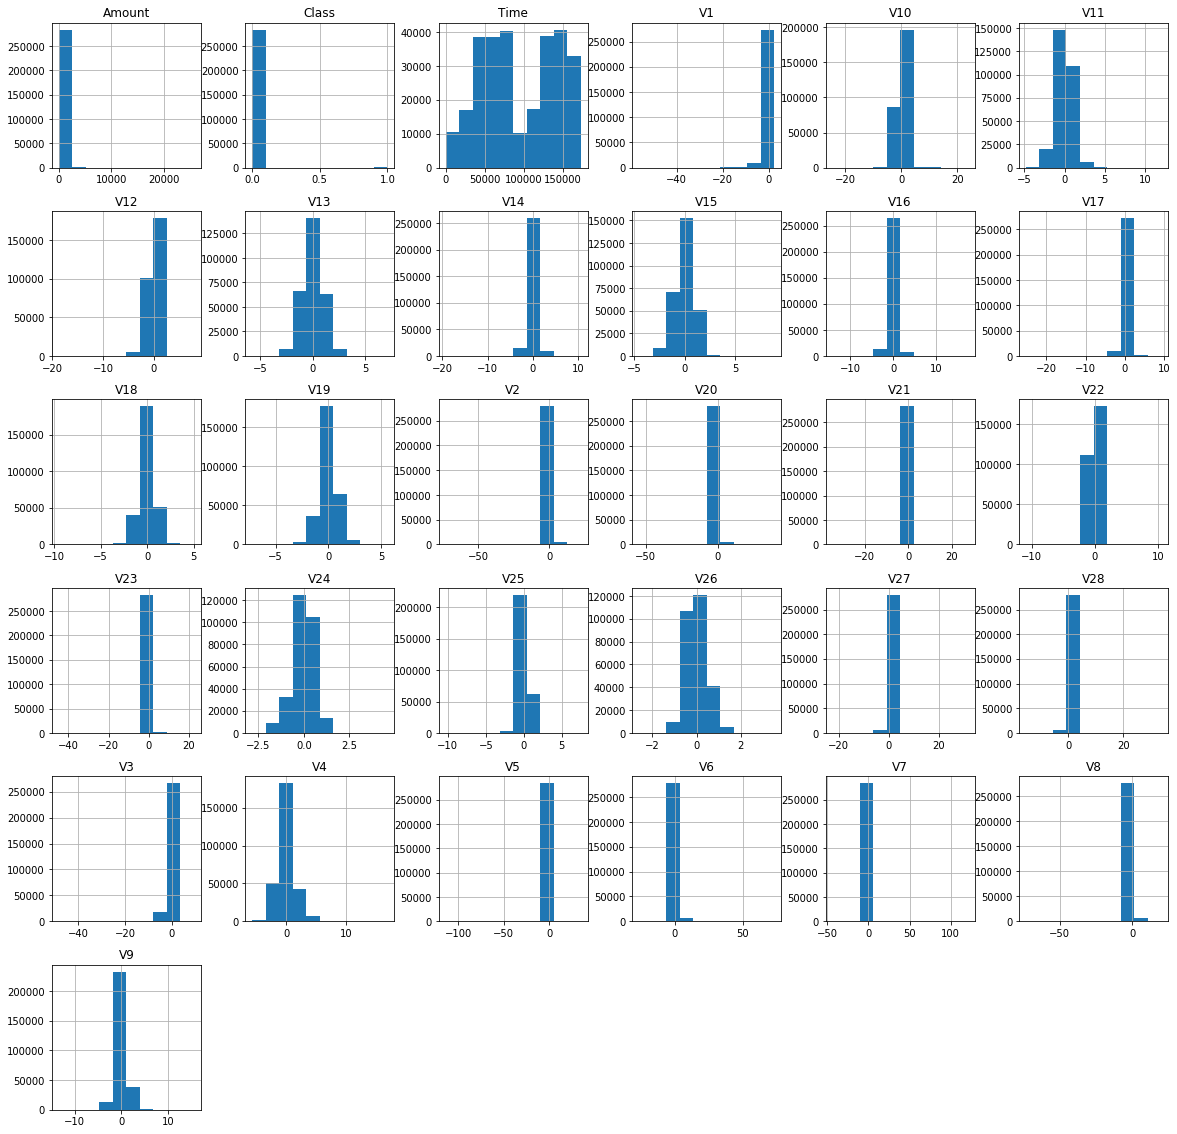

In [7]:
p = df.hist(figsize=(20,20))

We see that most of the features are normalized and all have mean 0 except 'Time' and 'Amount'. We need to further investigate these two features

### Exploration on feature 'Amount'

In [8]:
df[['Amount']].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


*   The average transaction amount is 88.35
*    Minimum amount is 0.0 and maximum amount 25691.16.

#### Distribution of Transaction Amount

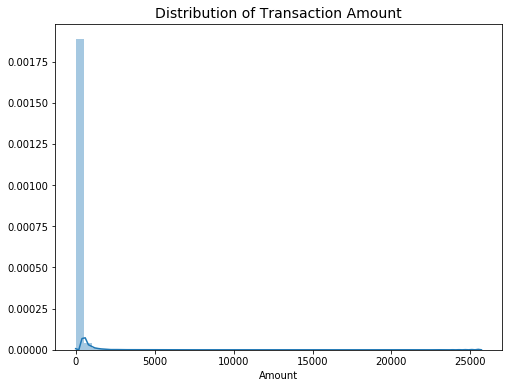

In [9]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(df['Amount'])
plt.show()

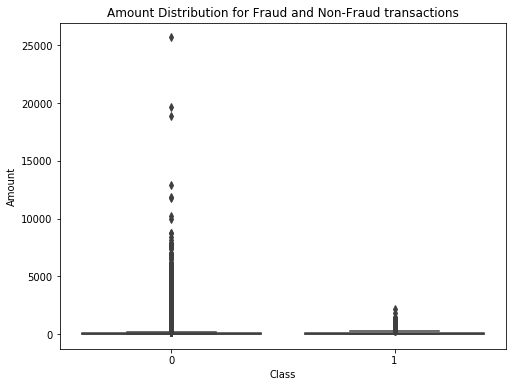

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount',data = df)
plt.title('Amount Distribution for Fraud and Non-Fraud transactions')
plt.show()

* The distribution of amount is highly positively skewed.
* The boxplot shows that the dataset contains extreme outliers. For example, the maximun amount is 25691.16 as shown previously but the value of third quartile is 77.165

#### Distribution of Amount for Fraudulent & Genuine transactions

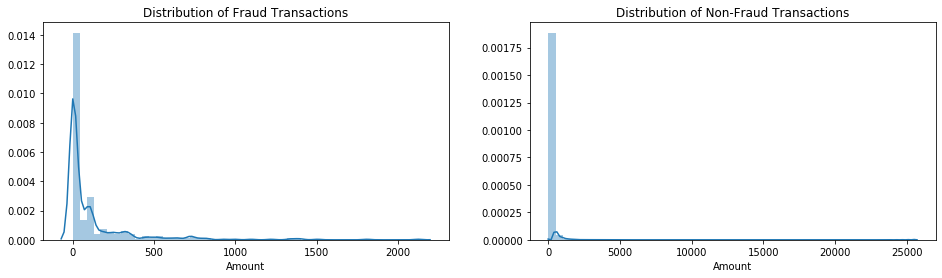

In [11]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['Class'] == 1]['Amount'], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['Class'] == 0]['Amount'], ax=axs[1])
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

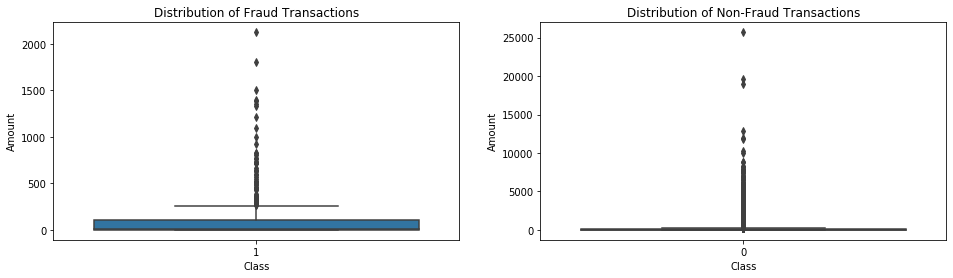

In [12]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.boxplot(x='Class', y='Amount', data = df[df['Class'] == 1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.boxplot(x='Class', y='Amount', data = df[df['Class'] == 0], ax=axs[1])
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

*   The value of outliers in non-fraud transactions is higher as compared to fraud transactions
*   The performance of machine learning models is usually affected by outliers. In the later stage, we will compare the performance of model after and before we perform outlier removal.

### Exploration on feature 'Time'

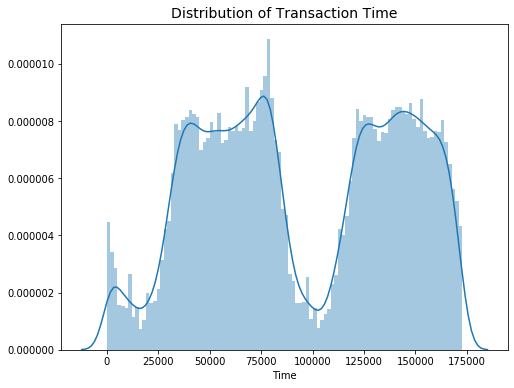

In [13]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['Time'], bins=100)
plt.show()

From the graph above, we can see that there are 2 peaks which represent the day time in the 2 days. While the depth represent the transaction made during night time.

# Data Preparation

## Rationale for inclusion/exclusion

All the features will be included in model training except 'Time' feature. Logically speaking, the time interval between the transactions will not determine whether a transaction is a fraud or non-fraud. Therefore, the 'Time' feature will be drop from the dataset.  

In [41]:
print('Split dataset to feature variable X and target variable Y.')
print()

# Assign all features and data to variable X except columns 'Time' and 'Class'
X = df.drop(['Class','Time'], axis=1)

# Assign target variable and data to variable Y
Y = df['Class']

Split dataset to feature variable X and target variable Y.



# Modelling

This stage will perform modelling of fraud detection. To find out the best modelling technique, assessment of each technique will be provided.

## Modelling techniques & assessment metrics

Modelling techniques used in this stage are listed as below:

* Logistic Regression
* K-Nearest Neighbor
* Support Vector Machine
* Random Forest

Metrics involved for assessment:
* Confusion Matrix
   * True Positive: Refers to the samples that were correctly classified as fraud.
   * True Negative: Refers to the samples that were correctly classified as non-fraud.
   * False Positive: Refers to the samples that were incorrectly classifeid as fraud.
   * False Negative: Refers to the samples that were incorrectly classified as non-fraud.
* Accuracy: To determine overall correctness of the classifier.
    * Accuracy = (TP + TN) / (TP + TN + FP + FN) 

* Precision: To determine the actual fraud transactions from the predicted fraud transactions. 
    * Precision = TP / (TP + FP) 

* Recall: To determine the correct classification
of the actual fraud transactions.
    
    * Recall = TP / (TP+FN)

* F1 Score: A balance between the precision and     recall for the classifier.
   
    * F1 = 2 * (precision * recall) / (precision + recall)

At first, we will train and assess four baseline model with these techniques. Then, we will apply different methods to improve the model with best performance.


## Test Design

To evalute the model, we need to split the dataset to training set for modelling and testing set for assessment. The ratio of the training set and testing set is 8:2.

In [42]:
X_train, X_test, y_train, y_test = tts(X, Y, train_size=0.8, test_size=0.2, random_state=42)

rb = RobustScaler()

X_train['Amount'] = rb.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['Amount'] = rb.transform(X_test['Amount'].values.reshape(-1, 1))

C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Austin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Build Model

### Parameter settings

In here, all technique will be built with default parameter. Except the solver of Logistic Regression will change to 'liblinear' to avoid failed convergence.

In [16]:
lr = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_jobs=-1)
svm = SVC()

In [17]:
def buildModel(modelName, model):
    print(modelName)
    print()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Confusion Matrix")
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues')
    plt.show()

    print()
    print("Accuracy:",round(accuracy_score(y_test, y_pred),5))
    print("Precision:",round(precision_score(y_test, y_pred),5))
    print("Recall:",round(recall_score(y_test, y_pred),5))
    print("F1 Score:",round(f1_score(y_test, y_pred),5))

    print()
    print("Classification Report")
    print(classification_report(y_test, y_pred))

Logistic Regression

Confusion Matrix


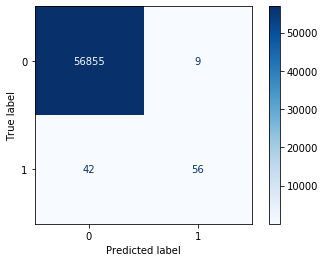


Accuracy: 0.9991
Precision: 0.86154
Recall: 0.57143
F1 Score: 0.68712

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
buildModel("Logistic Regression", lr)

K-Nearest Neighbor

Confusion Matrix


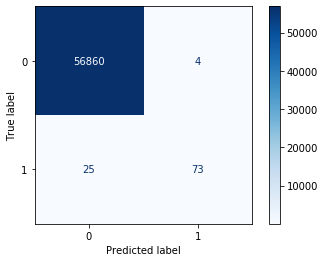


Accuracy: 0.99949
Precision: 0.94805
Recall: 0.7449
F1 Score: 0.83429

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [19]:
buildModel("K-Nearest Neighbor", knn)

Random Forest

Confusion Matrix


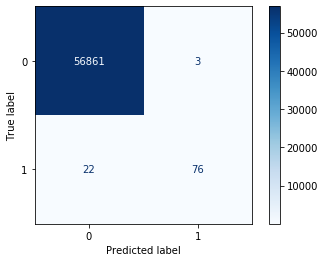


Accuracy: 0.99956
Precision: 0.96203
Recall: 0.77551
F1 Score: 0.85876

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [20]:
buildModel("Random Forest", rf)

Support Vector Machine

Confusion Matrix


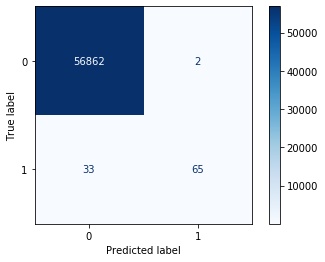


Accuracy: 0.99939
Precision: 0.97015
Recall: 0.66327
F1 Score: 0.78788

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.66      0.79        98

    accuracy                           1.00     56962
   macro avg       0.98      0.83      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [21]:
buildModel("Support Vector Machine", svm)

**Notes**
* From the results above, we can conclude that Random Forest is the best model with highest recall (0.77551), and F1 Score (0.86857).
* Random Forest able to detect 76 fraud trasactions (TP) and misidentify 22 fraud transactions (FN)
* With the performance of Random Forest, we will build and assess another powerful ensemble method, XGBoost.

XGBoost

Confusion Matrix


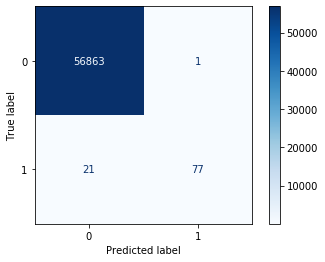


Accuracy: 0.99961
Precision: 0.98718
Recall: 0.78571
F1 Score: 0.875

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [22]:
xgb = XGBClassifier(tree_method='gpu_hist')

buildModel("XGBoost", xgb)

XGBoost show better recall and precision as compared to RandomForest. Besides, due to its implementation, XGBoost also has the advantages of training a model within a short period of time in comparison with RandomForest. We will select XGBoost as the final model and use different techniques to verify and tackle the problem of the dataset such as Class Imbalance, Outliers, and Hyperparameter Tuning.

## Class Imbalance

Class imbalance refers to where the total number of a class of data (positive) is far less than the total number of another class of data (negative). Which this problem has occur in our dataset. We will perform 3 resampling methods to try to tackle the issue. Resampling refers to produce similar/same data of from the positive class to obtain a balance dataset. The 3 resampling methods involved is SMOTE, ADASYN, and Random Oversampling.

In [23]:
smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)
ros = RandomOverSampler(random_state=42)
resamplingMethods = [smote, adasyn, ros]

XGBoost With SMOTE

Confusion Matrix


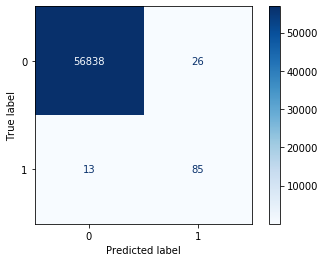


Accuracy: 0.99932
Precision: 0.76577
Recall: 0.86735
F1 Score: 0.8134

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.87      0.81        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
xgbSmote = Pipeline([('smote', smote), ('xgb', xgb)])
buildModel("XGBoost With SMOTE", xgbSmote)

XGBoost With ADASYN

Confusion Matrix


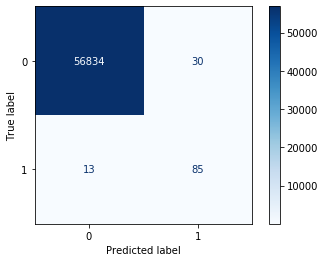


Accuracy: 0.99925
Precision: 0.73913
Recall: 0.86735
F1 Score: 0.79812

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.87      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
xgbAdasyn = Pipeline([('adasyn', adasyn), ('xgb', xgb)])
buildModel("XGBoost With ADASYN", xgbAdasyn)

XGBoost With Random Oversampling

Confusion Matrix


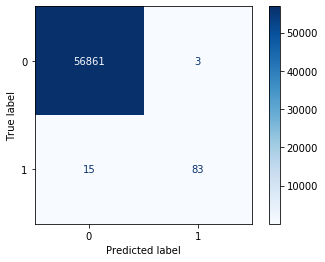


Accuracy: 0.99968
Precision: 0.96512
Recall: 0.84694
F1 Score: 0.90217

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.85      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
xgbRos = Pipeline([('ros', ros), ('xgb', xgb)])
buildModel("XGBoost With Random Oversampling", xgbRos)

From the results above, SMOTE has shown a best improvement as compared to others 2 resampling methods and the original dataset. We will select XGBoost with SMOTE to continue the model building.

## Outlier Removal

In machine learning problems, the exists of outlier often affect the performance of a model. To tackle this issue, we will remove outlier in the feature 'Amount' and see whether outlier removel can improve the result of our model.

In [43]:
# # -----> amount Removing Outliers
amount = X_train['Amount']
q25, q75 = np.percentile(amount, 25), np.percentile(amount, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
amount_iqr = q75 - q25
print('iqr: {}'.format(amount_iqr))

amount_cut_off = amount_iqr * 1.5
amount_lower, amount_upper = q25 - amount_cut_off, q75 + amount_cut_off
print('Cut Off: {}'.format(amount_cut_off))
print('amount Lower: {}'.format(amount_lower))
print('amount Upper: {}'.format(amount_upper))

outliers = [x for x in amount if x < amount_lower or x > amount_upper]
print('Feature amount Outliers: {}'.format(len(outliers)))

outliers_index = (X_train[( X_train['Amount'] > amount_upper) | (X_train['Amount'] < amount_lower)].index)
X_train_noOutliers = X_train.drop(index=outliers_index)
y_train_noOutliers = y_train.drop(index=outliers_index)
print("Shape of training data after outlier removal: {}".format(X_train_noOutliers.shape))

Quartile 25: -0.22937062937062935 | Quartile 75: 0.7706293706293705
iqr: 0.9999999999999999
Cut Off: 1.4999999999999998
amount Lower: -1.7293706293706292
amount Upper: 2.2706293706293703
Feature amount Outliers: 25553
Shape of training data after outlier removal: (202292, 29)


XGBoost (SMOTE) Without Outliers

Confusion Matrix


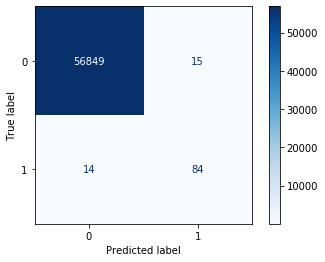


Accuracy: 0.99949
Precision: 0.84848
Recall: 0.85714
F1 Score: 0.85279

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.86      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [44]:
pipeline = Pipeline([('resamplingMethod', smote), ('xgb', xgb)])
print("XGBoost (SMOTE) Without Outliers")
print()
pipeline.fit(X_train_noOutliers, y_train_noOutliers)
y_pred = pipeline.predict(X_test)

print("Confusion Matrix")
plot_confusion_matrix(pipeline, X_test, y_test, cmap='Blues')
plt.show()

print()
print("Accuracy:",round(accuracy_score(y_test, y_pred),5))
print("Precision:",round(precision_score(y_test, y_pred),5))
print("Recall:",round(recall_score(y_test, y_pred),5))
print("F1 Score:",round(f1_score(y_test, y_pred),5))

print()
print("Classification Report")
print(classification_report(y_test, y_pred))

Although outlier removel has successfully improved the precision, but it has reduced the recall of the model. Since our aim to to achieve model with high recall score. We will not apply outlier removal to the dataset.

## Feature Selection

Not all the feature provide contribution to the performance of a model. Sometimes, a redundant feature might slow down the training process or even affect the performance of a model. We will conduct feature selection to find out which feature is important to the training of the XGBoost model.

In [29]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from numpy import sort
import numpy

X_res, y_res = smote.fit_sample(X_train, y_train)

model = XGBClassifier(tree_method='gpu_hist')

model.fit(X_res, y_res)

predictions = model.predict(X_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
print("Recall for current model (XGBoost With SMOTE): {:.5f}".format(recall))
print("Precision for current model (XGBoost With SMOTE): {:.5f}".format(precision))

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_res)
    selection_model = XGBClassifier(tree_method='gpu_hist')
    selection_model.fit(select_X_train, y_res)
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)

    print("Thresh={:.5f}, n={}, Recall: {:.5f}, Precision: {:.5f}".format(thresh, select_X_train.shape[1], recall, precision))

Recall for current model (XGBoost With SMOTE): 0.86735
Precision for current model (XGBoost With SMOTE): 0.76577
Thresh=0.00455, n=29, Recall: 0.86735, Precision: 0.76577
Thresh=0.00468, n=28, Recall: 0.83673, Precision: 0.75926
Thresh=0.00605, n=27, Recall: 0.84694, Precision: 0.74107
Thresh=0.00635, n=26, Recall: 0.87755, Precision: 0.77477
Thresh=0.00811, n=25, Recall: 0.86735, Precision: 0.72650
Thresh=0.00865, n=24, Recall: 0.84694, Precision: 0.76852
Thresh=0.00895, n=23, Recall: 0.86735, Precision: 0.76577
Thresh=0.00921, n=22, Recall: 0.82653, Precision: 0.72321
Thresh=0.00931, n=21, Recall: 0.83673, Precision: 0.76636
Thresh=0.01016, n=20, Recall: 0.84694, Precision: 0.73451
Thresh=0.01017, n=19, Recall: 0.84694, Precision: 0.75455
Thresh=0.01039, n=18, Recall: 0.83673, Precision: 0.72566
Thresh=0.01045, n=17, Recall: 0.84694, Precision: 0.68595
Thresh=0.01056, n=16, Recall: 0.80612, Precision: 0.69912
Thresh=0.01107, n=15, Recall: 0.81633, Precision: 0.64000
Thresh=0.01122, n

In [30]:
features_name = X_res.iloc[:, numpy.argsort(model.feature_importances_)[-26:]].columns
print(features_name)

Index(['V20', 'V21', 'V23', 'V16', 'V9', 'V7', 'V10', 'V3', 'V18', 'V1', 'V19',
       'V25', 'V13', 'V6', 'V2', 'V5', 'V11', 'Amount', 'V15', 'V17', 'V27',
       'V26', 'V12', 'V8', 'V4', 'V14'],
      dtype='object')


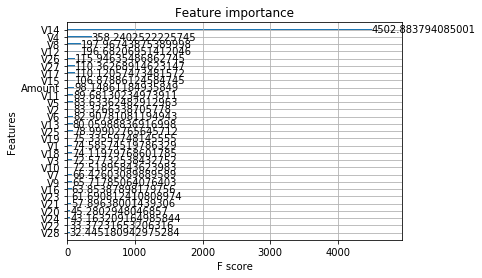

In [31]:
plot_importance(model, importance_type='gain')
pyplot.show()

From the results above, when we only choose the top 2 features to train the model. We can get 0.90816 as the recall of the model. But note that at the same time, the precision has dropped tremendously to 0.04226. A low precision will identify fraud transaction wrongly which thus reduce customer experience. To avoid this, we will select top 26 features to train the final model as the model shows a high recall (0.87755) and resonable precision (0.77477).

### Verify the result of Feature Selection

In [32]:
X_res = X_res[['V20', 'V21', 'V23', 'V16', 'V9', 'V7', 'V10', 'V3', 'V18', 'V1', 'V19',
       'V25', 'V13', 'V6', 'V2', 'V5', 'V11', 'Amount', 'V15', 'V17', 'V27',
       'V26', 'V12', 'V8', 'V4', 'V14']]
X_test = X_test[['V20', 'V21', 'V23', 'V16', 'V9', 'V7', 'V10', 'V3', 'V18', 'V1', 'V19',
       'V25', 'V13', 'V6', 'V2', 'V5', 'V11', 'Amount', 'V15', 'V17', 'V27',
       'V26', 'V12', 'V8', 'V4', 'V14']]

XGBoost With SMOTE (After Feature Selection)

Confusion Matrix


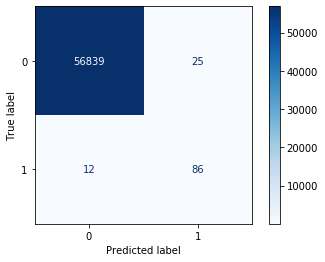


Accuracy: 0.99935
Precision: 0.77477
Recall: 0.87755
F1 Score: 0.82297

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.88      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [39]:
print("XGBoost With SMOTE (After Feature Selection)")
print()
xgb.fit(X_res, y_res)
y_pred = xgb.predict(X_test)

print("Confusion Matrix")
plot_confusion_matrix(xgb, X_test, y_test, cmap='Blues')
plt.show()

print()
print("Accuracy:",round(accuracy_score(y_test, y_pred),5))
print("Precision:",round(precision_score(y_test, y_pred),5))
print("Recall:",round(recall_score(y_test, y_pred),5))
print("F1 Score:",round(f1_score(y_test, y_pred),5))

print()
print("Classification Report")
print(classification_report(y_test, y_pred))

## Hyperparameter Tuning

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. We will perform GridSearchCV to the XGBoost model to see whether the hyperparameter able to improve the result.

In [34]:
param_grid = {"learning_rate" : [0.1, 0.2, 0.3], 
              "max_depth" : [4, 5, 6],
              "gamma" : [0, 1, 5],
              "subsample" : [0.8, 0.9, 1]}

gs = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='recall', verbose=True)
gs.fit(X_res,y_res)

In [35]:
print(gs.best_params_)
print(gs.best_score_)

In [36]:
gs.best_estimator_

XGBoost

Confusion Matrix


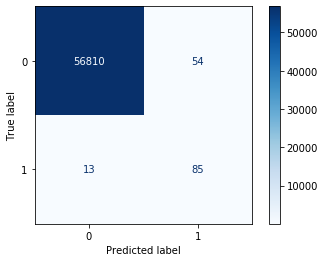


Accuracy: 0.99882
Precision: 0.61151
Recall: 0.86735
F1 Score: 0.7173

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.87      0.72        98

    accuracy                           1.00     56962
   macro avg       0.81      0.93      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [37]:
xgb = XGBClassifier(tree_method='gpu_hist',
                   learning_rate=0.2,
                   max_depth=6,
                   subsample=0.8,
                   gamma=0)

print("XGBoost")
print()
xgb.fit(X_res, y_res)
y_pred = xgb.predict(X_test)

print("Confusion Matrix")
plot_confusion_matrix(xgb, X_test, y_test, cmap='Blues')
plt.show()

print()
print("Accuracy:",round(accuracy_score(y_test, y_pred),5))
print("Precision:",round(precision_score(y_test, y_pred),5))
print("Recall:",round(recall_score(y_test, y_pred),5))
print("F1 Score:",round(f1_score(y_test, y_pred),5))

print()
print("Classification Report")
print(classification_report(y_test, y_pred))

From the result above, we can see that the best hyperparameter from GridSearchCV did not obtain any improvement on the testing dataset. We will select the XGBoost (SMOTE) with default parameter as the final model for this project.

## Robustness

From the various assessment conducted above, it was only applied to a portion of the dataset. To validate whether our model able to predict fraud transaction in real life, we need to perform cross-validation so that our model able to perform prediction to all data in the dataset and we then interpret the result from the cross-validation.

In [38]:
X = df.drop(['Class','Time','V22','V24','V28'], axis=1)
Y = df['Class']

recall = []

xgb = XGBClassifier(tree_method='gpu_hist')
xgbSmote = Pipeline([('smote', smote), ('xgb', xgb)])

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(X, Y)

for train_index, text_index in skf.split(X,Y):
    print("Train:", train_index, "Validation:", text_index)
    X1_train, X1_test = X.iloc[train_index], X.iloc[text_index]
    y1_train, y1_test = Y.iloc[train_index], Y.iloc[text_index]

    xgbSmote.fit(X1_train, y1_train)
    y_pred = xgbSmote.predict(X1_test)
    recallScore = recall_score(y_pred, y1_test)
    recall.append(round(recallScore,5))
    
print("Results of recall for the final model: ")
print(recall)
print(round(sum(recall)/5,5))

Train: [     0      1      2 ... 284804 284805 284806] Validation: [     5      7      9 ... 284778 284793 284799]
Train: [     0      3      4 ... 284804 284805 284806] Validation: [     1      2     13 ... 284792 284797 284801]
Train: [     1      2      5 ... 284800 284801 284803] Validation: [     0      3      4 ... 284804 284805 284806]
Train: [     0      1      2 ... 284804 284805 284806] Validation: [    14     19     27 ... 284795 284796 284800]
Train: [     0      1      2 ... 284804 284805 284806] Validation: [    11     15     22 ... 284791 284794 284803]
Results of recall for the final model: 
[0.78846, 0.85437, 0.84, 0.80392, 0.79048]
0.81545


We can see that when dealing with unseen data, the lowest recall and highest recall of the final model is 0.78846 and 0.85437. The average recall is 0.81545. This means that the final model is robust enough to detect fraud transaction from real life data.

# Deployment

## Deployment plan

The folloing steps describe how to deploy the model into production environment with REST API and Flask.
1. Export the final model to a pickle file

   The final model should be exported to a pickle file so that we can reuse it at anytime and anywhere without continuously operate the kernel of IPython Notebook.
   
   
2. Create REST API with Flask and Python for model

   To obtain prediction result, we need to create an API endpoint. We need to create an API endpoint with Python and Flash. With the endpoint, we can send the data of required features to the endpoint and it will return the prediction result.
   
   
3. Integrate with payment system

   We need to create a instruction that will integrate with the current payment system. Whenever a customer make payment, after the information of the payment is stored in the database, the system automatically send the required feature to the endpoint in the second step. Then, the system will receive the prediction result and display the result to the merchant or customer to perform further inventigation or any other actions.

## Monitoring and maintenance plan

1. Development and experimentation: New machine algorithms and modeling are repetively tried out where steps of the experiments are organized. Source code of the machine learning pipeline steps will be the output of this stage and is then pushed to a source repository.


2. Pipeline continuous integration: Source code will be built and various tests will be run. In this stage, the outputs will be the pipeline components (packages, executables, and artifacts) to be deployed in later stages.


3. Pipeline continuous delivery: The artifacts produced in the continuous integration stage will be deployed to target environment. The output of this stage will be the pipeline which was deployed with the new implementation of the model.


4. Automated triggering: Based on a schedule or in response to a trigger, the pipeline is executed automatically in production. The output of this stage will be a trained model that is pushed to the model registry.


5. Model continuous delivery: The trained model will be serve as a prediction service for the predictions. A deployed model pridiction service will be the output of this stage.


6. Monitoring: Statistics on the model performance based on data will be collected. The output of this stage is a trigger to execute the pipeline or to execute a new experiment cycle. 

# Conclusion

In this project, we have successfully produced a fraud detection model with XGBoost that able to detect 81.545% (average) of fraud transaction. The final model able to being retrained in a short period of time due to the implementation of XGBoost which is consider as a strength during the maintenance plan.

However, due to time and hardware constraints, further improvement as listed below can be conducted to improve the result and performance.
* The dataset only contain transaction of 2 days, we need more data to build a more robust model.
* Due to hardware limitation, we only conduct GridSearchCV on a certain hyperparameter. In the future, one might conduct GridSearchCV on more hyperparameters to produce a better model.
* Develop a deep learning model (neural network) and evaluate the performance as compared to the XGBoost model.